In [172]:
%pylab inline
%matplotlib inline
n=36
m=10
J=48
root='../'#''../../Spherical Shell Data/'

Populating the interactive namespace from numpy and matplotlib


In [173]:
weights_file = root+'weight_files/jackknife_weights_n%d_m%d_j%d.dat'%(n,m,J)
RR_file=root+'weight_files/binned_pair_counts_n%d_m%d_j%d.dat'%(n,m,J)
EE1_file = root+'CovMatricesAll/EE1_n%d_m%d_full.txt' %(n,m)
EE2_file = root+'CovMatricesAll/EE2_n%d_m%d_full.txt' %(n,m)
Cx_file = root+'CovMatricesJack/cxj_n%d_m%d_full.txt' %(n,m)
C2_file = root+'CovMatricesJack/c2j_n%d_m%d_full.txt' %(n,m)
C3_file = root+'CovMatricesJack/c3j_n%d_m%d_full.txt' %(n,m)
C4_file = root+'CovMatricesJack/c4j_n%d_m%d_full.txt' %(n,m)

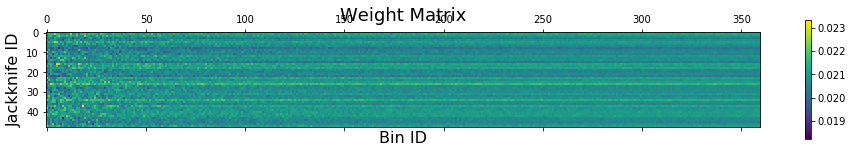

In [174]:
weights=np.loadtxt(weights_file)[:,1:]
plt.matshow(weights);FS=16;
plt.ylabel('Jackknife ID',fontsize=FS)
plt.xlabel('Bin ID',fontsize=FS)
plt.colorbar()
plt.title('Weight Matrix',fontsize=FS+2);

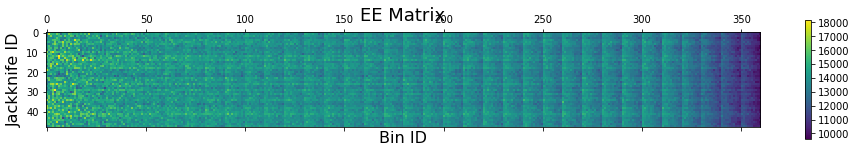

<Figure size 432x288 with 0 Axes>

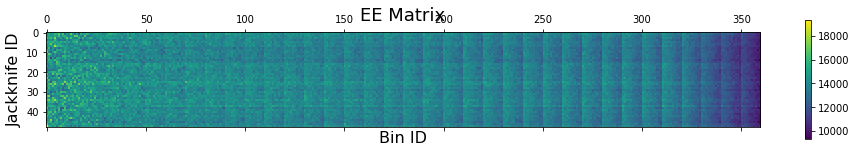

In [175]:
EEaA1=np.loadtxt(EE1_file)
EEaA2=np.loadtxt(EE2_file)
plt.matshow(EEaA1);FS=16;
plt.ylabel('Jackknife ID',fontsize=FS)
plt.xlabel('Bin ID',fontsize=FS)
plt.colorbar()
plt.title('EE Matrix',fontsize=FS+2);
plt.figure()
plt.matshow(EEaA2);FS=16;
plt.ylabel('Jackknife ID',fontsize=FS)
plt.xlabel('Bin ID',fontsize=FS)
plt.colorbar()
plt.title('EE Matrix',fontsize=FS+2);

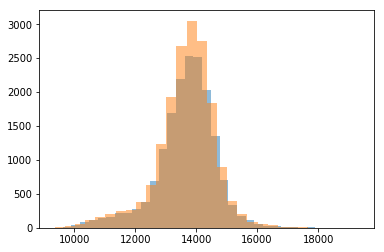

In [176]:
plt.hist(EEaA1.ravel(),alpha=0.5,bins=30)
plt.hist(EEaA2.ravel(),alpha=0.5,bins=30);

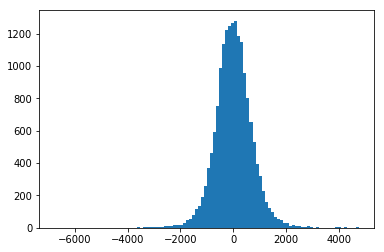

In [177]:
plt.hist(EEaA1.ravel()-EEaA2.ravel(),bins=100);

In [178]:
EEa1=np.sum(EEaA1,axis=0)
EEa2=np.sum(EEaA2,axis=0)

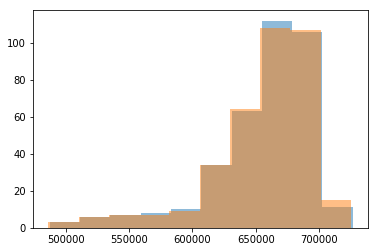

In [179]:
plt.hist(EEa1,alpha=0.5);
plt.hist(EEa2,alpha=0.5);

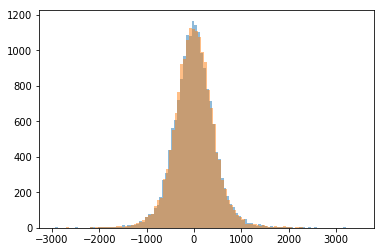

In [180]:
d1=EEaA1-weights*EEa1
d2=EEaA2-weights*EEa2
plt.hist(d1.ravel(),alpha=0.5,bins=100)
plt.hist(d2.ravel(),alpha=0.5,bins=100);

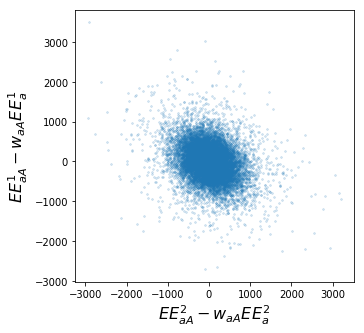

In [181]:
fig=plt.figure(figsize=(5,5))
plt.scatter(d1.ravel(),d2.ravel(),marker='x',alpha=0.2,s=3)
plt.ylabel(r'$EE_{aA}^1-w_{aA}EE_a^1$',fontsize=FS);plt.xlabel(r'$EE_{aA}^2-w_{aA}EE_a^2$',fontsize=FS);

In [182]:
from scipy.stats.stats import pearsonr
pmcc=pearsonr(d1.ravel(),d2.ravel())
print("Pearson R: %.2f, probability of randomness: %.1e" %(pmcc[0],pmcc[1]))

Pearson R: -0.28, probability of randomness: 7.4e-320


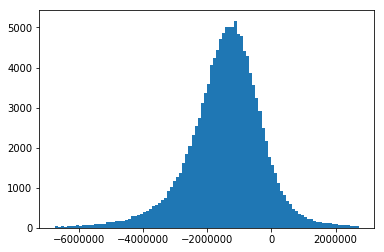

In [183]:
dd=np.matmul(d1.T,d2)
plt.hist(dd.ravel(),bins=100,range=np.percentile(dd,[0.4,99.6]));

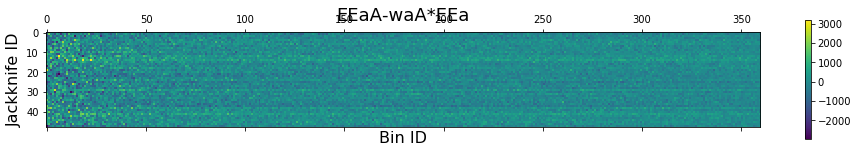

In [184]:
diffaA1=EEaA1-weights*EEa1
diffaA2=EEaA2-weights*EEa2
plt.matshow(diffaA1);FS=16;
plt.ylabel('Jackknife ID',fontsize=FS)
plt.xlabel('Bin ID',fontsize=FS)
plt.colorbar()
plt.title('EEaA-waA*EEa',fontsize=FS+2);

In [185]:
RRa = np.loadtxt(RR_file)
RRaRRb=np.matmul(np.asmatrix(RRa).T,np.asmatrix(RRa))
fact=np.matmul(np.asmatrix(weights).T,np.asmatrix(weights))

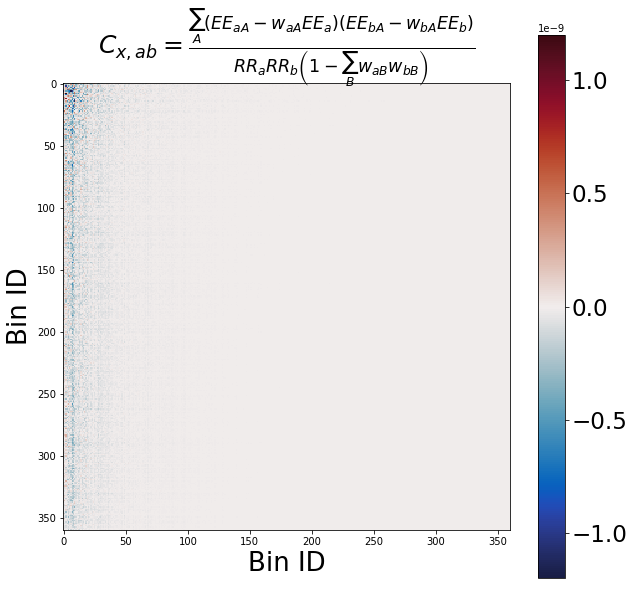

In [196]:
diff_mat=np.asarray(np.matmul(diffaA1.T,diffaA2)/np.matmul(fact,RRaRRb))
import cmocean
fig,ax=plt.subplots(1,figsize=(10,10))
vmax=max(diff_mat.ravel())
cax=ax.matshow(diff_mat,cmap=cmocean.cm.balance,vmax=vmax,vmin=-vmax);FS=26;
plt.gca().xaxis.tick_bottom()
ax.set_ylabel('Bin ID',fontsize=FS)
ax.set_xlabel('Bin ID',fontsize=FS)
cbar=fig.colorbar(cax);
cbar.ax.tick_params(labelsize=FS-3)
plt.title(r'$C_{x,ab}=\frac{\sum_A(EE_{aA}-w_{aA}EE_a)(EE_{bA}-w_{bA}EE_b)}{RR_aRR_b\left(1-\sum_B{w_{aB}w_{bB}}\right)}$',fontsize=FS-1);

In [188]:
c_disconn=np.zeros_like(cxj)
for a in range(len(c_disconn)):
    for b in range(len(c_disconn)):
        tmp_ab = 0.
        weights_ab = 0.
        for A in range(len(weights)):
            tmp_ab+=(EEaA1[A,a]-weights[A,a]*EEa1[a])*(EEaA2[A,b]-weights[A,b]*EEa2[b])
            weights_ab+=weights[A,a]*weights[A,b]
        c_disconn[a,b]=tmp_ab/(RRa[a]*RRa[b]*(1.-weights_ab))

In [189]:
c_disconn11=np.zeros_like(cxj)
for a in range(len(c_disconn)):
    for b in range(len(c_disconn)):
        tmp_ab = 0.
        weights_ab = 0.
        for A in range(len(weights)):
            tmp_ab+=(EEaA1[A,a]-weights[A,a]*EEa1[a])*(EEaA1[A,b]-weights[A,b]*EEa1[b])
            weights_ab+=weights[A,a]*weights[A,b]
        c_disconn11[a,b]=tmp_ab/(RRa[a]*RRa[b]*(1.-weights_ab))

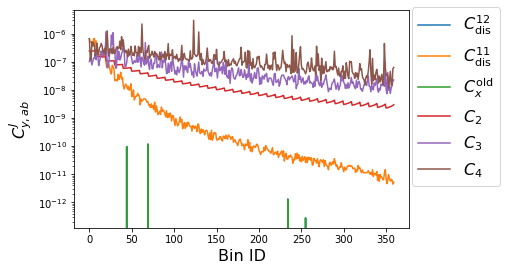

In [194]:
c2j=np.loadtxt(C2_file);
c3j=np.loadtxt(C3_file);c4j=np.loadtxt(C4_file)
plt.plot(np.diag(c_disconn),label=r'$C_\mathrm{dis}^{12}$')
plt.plot(np.diag(c_disconn11),label=r'$C_\mathrm{dis}^{11}$')
plt.plot(np.diag(cxj),label=r'$C_x^\mathrm{old}$')
plt.plot(c2j,label=r'$C_2$')
plt.plot(np.diag(c3j),label=r'$C_3$')
plt.plot(np.diag(c4j),label=r'$C_4$');
plt.xlabel('Bin ID',fontsize=FS);plt.ylabel(r'$C^J_{y,ab}$',fontsize=FS)
plt.legend(fontsize=FS,loc=9,bbox_to_anchor=(1.14,1.05));
plt.yscale('log')

In [195]:
np.sum(np.sign(c_disconn.ravel()))/len(c_disconn.ravel())

-0.8323148148148148